(1797, 64)


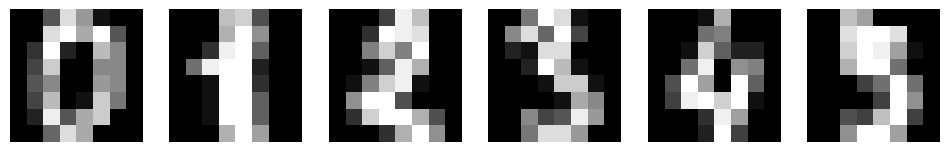

X[0] before scaling:  [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

# Load and visualize data
digits = load_digits()
print(digits.data.shape)

X = digits.data
y = digits.target

def drawDigitImages(inX):
    fig, axes = plt.subplots(1, 6, figsize=(12, 2))
    for i in range(6):
        axes[i].imshow(inX[i].reshape(8,8), cmap='gray')
        axes[i].axis('off')
    plt.show()

drawDigitImages(X)
print("X[0] before scaling: ",X[0])

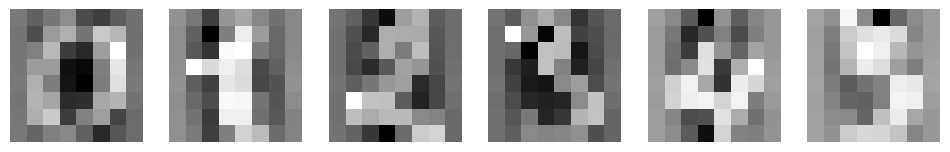

X[0] after scaling:  [ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -0.02359646 -0.29908135  0.08671869  0.20829258
 -0.36677122 -1.14664746 -0.5056698  -0.19600752]


In [131]:
# scaling the data
scaler = StandardScaler()
xScaled = scaler.fit_transform(X)
drawDigitImages(xScaled)
print("X[0] after scaling: ",xScaled[0])

In [132]:
# Applying one hot encoding to targets
nUniqueLabels = len(np.unique(y))
print("Number of categories: ",nUniqueLabels)
yEncoded = np.zeros((len(y), nUniqueLabels))
for i, label in enumerate(y):
    yEncoded[i, label] = 1

print("\nBefore: ",y[0:5])
print("After:", yEncoded[0:5])

# split data into test and train set
xTrain, xTest, yTrain, yTest = train_test_split(xScaled, yEncoded, test_size=0.2)

# printing data to make sure everything is okay
print("\nX train shape:", xTrain.shape)
print("X test shape:", xTest.shape)
print("yTrain[0:2]: ", yTrain[0:2])


Number of categories:  10

Before:  [0 1 2 3 4]
After: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

X train shape: (1437, 64)
X test shape: (360, 64)
yTrain[0:2]:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [144]:

class MyNeuralNetwork:
    def __init__(self, nwLayer, actFnName = 'tanh'):
        self.nwLayer = nwLayer
        self.actFnName = actFnName
        self.actFn = None
        self.actFnDeriv = None
        self.costList = []

        # define weight and biases randomly
        self.weights = []
        self.bias = []
        for i in nwLayer[1:]:
            self.bias.append(np.random.random_sample((i,)))
        for i, j in zip(nwLayer[:-1], nwLayer[1:]):
            self.weights.append(np.random.random_sample((j, i)))

        # set activation function 
        if actFnName == 'relu':
            self.actFn = self.relu
            self.actFnDeriv = self.reluDeriv
        elif actFnName == 'sigmoid':
            self.actFn = self.sigmoid
            self.actFnDeriv = self.sigmoidDeriv
        elif actFnName == 'tanh':
            self.actFn = self.tanh
            self.actFnDeriv = self.tanhDeriv
        
    # sigmoid function and its derivative
    def sigmoid(self,x):
        return (1/(1+np.exp(-x)))
    def sigmoidDeriv(self, x):
        s = self.sigmoid(x)
        return s * (1 -s)
    
    # hyperbolic tangent and its derivative 
    def tanh(self, x):
        return np.tanh(x)
    def tanhDeriv(self,x):
        t = np.tanh(x)
        return 1 - t ** 2
    
    # relu function and its derivative
    def relu(self, x):
        return x * (x > 0)
    def reluDeriv(self, x):
        return 1. * (x>0)
    
    # forward propagation
    def forwardPass(self, x):
        a = [x]
        z = [[]]

        # for each layer
        for i in range(len(self.nwLayer)-1): 
            bi = self.bias[i]
            wi = self.weights[i]
            z.append(wi.dot(a[i]) + bi)
            a.append(self.actFn(z[i+1]))
        return a, z
    
    # backward propagation
    def backPropagate(self, dw, db, yi, a, z):
        errorTerm = {}
        lstly = len(self.nwLayer)-1 # last layer index
        errorTerm[lstly] = (a[lstly]-yi) * self.actFnDeriv(z[lstly])
        # calculate cost
        cost = sum((yi-a[lstly])**2)**0.5
        # backpropagate the error
        for i in range(lstly-1,-1,-1):
                if i > 0:  
                    errorTerm[i] = self.weights[i].T.dot(errorTerm[i+1]) * self.actFnDeriv(z[i])
                # update dW and db             
                dw[i] += errorTerm[i+1].reshape(-1, 1).dot(a[i].reshape(1, -1))
                db[i] += errorTerm[i+1]
        return cost, dw, db
    
    # train the model
    def trainNetwork(self, X, y, iters=3000, alpha=0.25):
        m,n = X.shape

        for cnt in range(iters):

            # initialize the change that will be calculated
            dW = []
            dB = []
            for i in range(1, len(self.nwLayer)):
              dW.append(np.zeros((self.nwLayer[i],self.nwLayer[i-1])))
              dB.append(np.zeros((self.nwLayer[i],)))
            cost = 0

            # for each instance:
            for i in range(m):
                a, z = self.forwardPass(X[i,:])
                cst, dW, dB = self.backPropagate(dW, dB, y[i,:], a, z)
                cost += cst

            # update weights and biases
            for i in range(len(self.nwLayer)-1):
              self.weights[i] -= (1.0/m) * alpha * dW[i]
              self.bias[i] -= (1.0/m) * alpha * dB[i]

            # add average cost
            self.costList.append(cost/m) 
    
    # predict
    def predict(self, X):
        # store the length of data
        m = X.shape[0] 
        y = np.zeros((m,)) # initialize
        
        # for each data:
        for i in range(m):
            a, z = self.forwardPass(X[i,:])
            # get the y with max prob
            y[i] = np.argmax(a[len(self.nwLayer)-1])
        return y


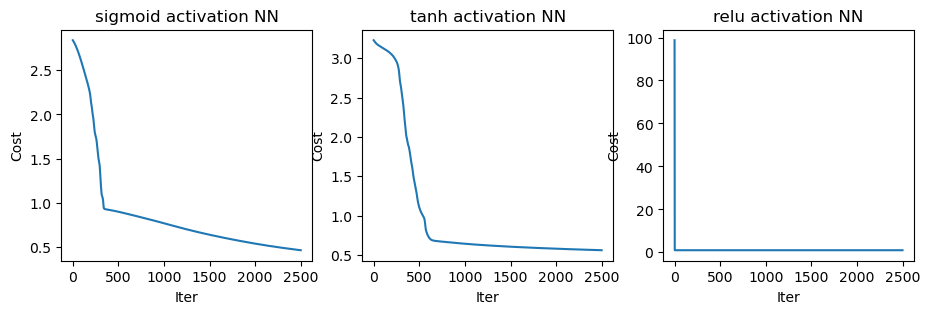

Sigmoid prediction accuracy is: 0.875
Tanh prediction accuracy is: 0.8805555555555555
Relu prediction accuracy is: 0.07777777777777778


In [150]:
def testNN(iters,alpha,nwLay):
    nn1 = MyNeuralNetwork(nwLayer=nwLay, actFnName="sigmoid")
    nn1.trainNetwork(xTrain, yTrain, iters, alpha)
    yP1 = nn1.predict(xTest)
    c1 = nn1.costList

    plt.figure(figsize=(11,3))
    plt.subplot(1, 3, 1)
    plt.plot(c1)
    plt.title("sigmoid activation NN")
    plt.xlabel("Iter")
    plt.ylabel("Cost")

    nn2 = MyNeuralNetwork(nwLayer=nwLay, actFnName="tanh")
    nn2.trainNetwork(xTrain, yTrain, iters, alpha)
    yP2 = nn2.predict(xTest)
    c2 = nn2.costList

    plt.subplot(1, 3, 2)
    plt.plot(c2)
    plt.title("tanh activation NN")
    plt.xlabel("Iter")
    plt.ylabel("Cost")

    nn3 = MyNeuralNetwork(nwLayer=nwLay, actFnName="relu")
    nn3.trainNetwork(xTrain, yTrain, iters, alpha)
    yP3 = nn3.predict(xTest)
    c3 = nn3.costList

    plt.subplot(1, 3, 3)
    plt.plot(c3)
    plt.title("relu activation NN")
    plt.xlabel("Iter")
    plt.ylabel("Cost")
    plt.show()

    print(f'Sigmoid prediction accuracy is: {accuracy_score(np.argmax(yTest, axis=1), yP1)}')
    print(f'Tanh prediction accuracy is: {accuracy_score(np.argmax(yTest, axis=1), yP2)}')
    print(f'Relu prediction accuracy is: {accuracy_score(np.argmax(yTest, axis=1), yP3)}')
    
    return

testNN(2500, 0.28, [64,30,10])


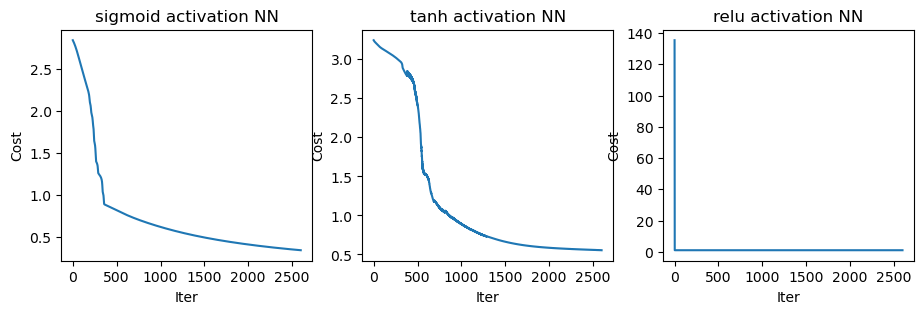

Sigmoid prediction accuracy is: 0.9
Tanh prediction accuracy is: 0.8944444444444445
Relu prediction accuracy is: 0.07777777777777778


In [152]:
# experimenting with different hyperparameters
testNN(2600, 0.40, [64,40,10])